---
title: "Introduction to Fast Fourier Transformer (FFT)"
author: "Kirtan Gangani"
date: 15 July 2025
categories: [Signal Processing, FFT]
format: 
  html:
    toc: true
    code-copy: true
    code-fold: false
jupyter: python3
---

# Introduction

Ever wondered how your phone recognizes your voice, how medical images are reconstructed, or how noise is filtered out of audio? Often working silently behind these everyday marvels is a powerful mathematical tool that might initially seem intimidating: the **Fast Fourier Transform (FFT)**. It's fundamental to signal processing, image processing, data analysis, and so much more. But what exactly *is* it, and why is it so 'fast'?

## The Core Idea

Imagine you have a complex sound, say, a mix of a flute, a drum, and a violin playing simultaneously. If you look at the sound wave over time, it just looks like a wobbly line. It's hard to tell what instruments are playing just by looking at that line.

This is where the **Fourier Transform** comes in. It is a mathematical operation that takes a signal (like our sound wave) from the **time domain** to the **frequency domain**. In the frequency domain, instead of seeing how the signal changes over time, you see *what frequencies are present* in that signal and *how strong each frequency is*.

Think of it like this:

* **Time Domain:** You hear the whole song at once.
* **Frequency Domain:** You can see individual musical notes (frequencies) and how loud each one is, allowing you to identify the flute's high notes, the drum's low thumps, and the violin's mid-range melodies.

## Why 'Fast'?

The basic Fourier Transform (specifically, the Discrete Fourier Transform or DFT for discrete digital signals) is computationally intensive. If you have **N** data points, calculating the DFT takes about $N^2$ operations. For large datasets, this can be incredibly slow.

This is why we need **Fast Fourier Transform (FFT)**! It's not a different transform, but rather an *efficient algorithm* for computing the DFT. It drastically reduces the number of computations, particularly when **N** is a power of 2. Instead of $N^2$, the FFT takes roughly $N \log_2(N)$ operations.

To put that into perspective:

* If $N = 1024$ (a common power of 2):
    * DFT operations: $1024^2 \approx 1,000,000$
    * FFT operations: $1024 \times \log_2(1024) = 1024 \times 10 \approx 10,000$
That's a **100-fold speedup**! This efficiency is what made the Fourier Transform practical for real-world applications.

The 'trick' behind the FFT often involves a divide-and-conquer approach, breaking down the large DFT calculation into smaller DFTs, and then cleverly combining the results. The most famous FFT algorithm is the **Cooley-Tukey algorithm**.

## What Does the FFT Output Look Like?

The output of the FFT is an array of **complex numbers**. Each complex number represents a specific frequency component in the original signal.

A complex number has two parts: a **real part** and an **imaginary part**. From these, we can derive two important pieces of information for each frequency:

1.  **Magnitude (Amplitude):** This tells us how strong or prominent a particular frequency component is in the original signal. A larger magnitude means that frequency contributes more to the signal.
    * Calculated as: $\sqrt{(\text{real part})^2 + (\text{imaginary part})^2}$
2.  **Phase:** This tells us about the shift or delay of that frequency component relative to a reference. While often less intuitive for beginners, phase is crucial in applications like signal reconstruction.

The output array is also symmetric. The first half of the array typically contains the positive frequencies, and the second half (or wrapped around to the beginning for specific conventions) contains the negative frequencies. For real-valued input signals, the negative frequencies are just mirror images of the positive ones, so we often focus on the first half of the spectrum.

## Applications of FFT (Beyond Sound)

The FFT's versatility makes it highly recommended across many fields:

* **Signal Processing:** Audio compression (MP3, AAC), noise reduction, speech recognition, telecommunications.
* **Image Processing:** Image compression (JPEG), edge detection, filtering, medical imaging (MRI, CT scans).
* **Data Analysis:** Financial market analysis, analyzing vibrations in mechanical systems, earthquake seismology.
* **Physics & Engineering:** Quantum mechanics, optics, structural analysis, circuit design.
* **Astronomy:** Analyzing signals from space, processing telescope data.

## A Simple Code Implementation (in Python)

Let's see the FFT in action! Python's `NumPy` library provides a highly optimized FFT implementation. We'll generate a simple signal consisting of two sine waves and then use FFT to reveal their frequencies.

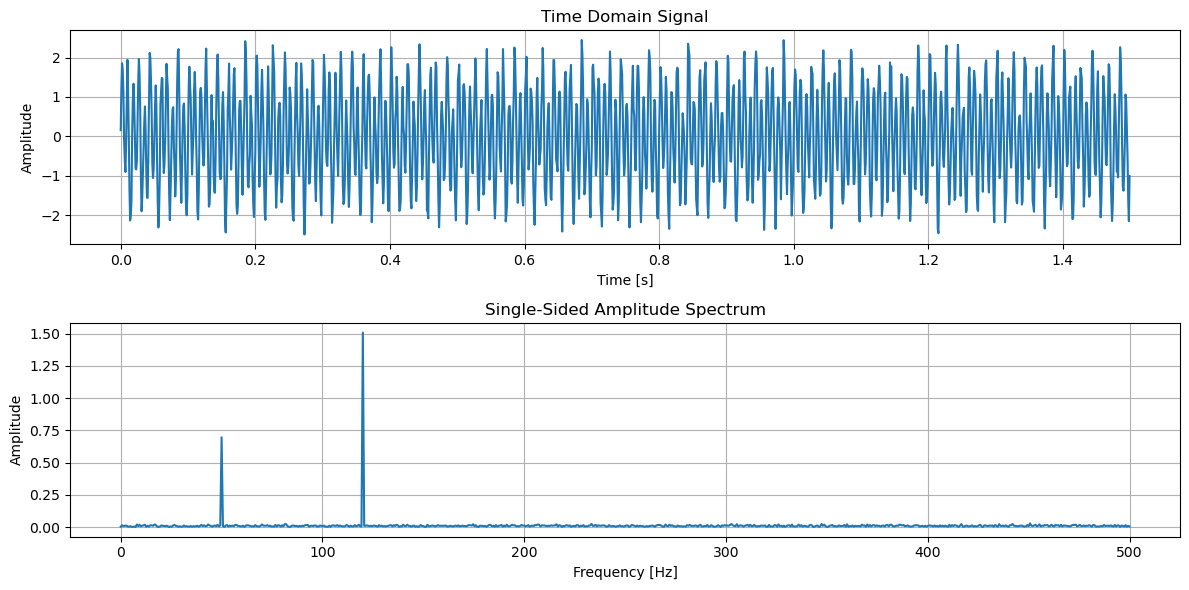

Dominant frequencies: 120.00 Hz and 50.00 Hz


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Fs = 1000            # Sampling frequency
L = 1500             # Number of samples
t = np.arange(L) / Fs  # Time vector

f1, f2 = 50, 120
signal = 0.7 * np.sin(2 * np.pi * f1 * t) + 1.5 * np.sin(2 * np.pi * f2 * t) + 0.2 * np.random.randn(L)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title('Time Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

Y = np.fft.fft(signal)
P = np.abs(Y / L)[:L//2+1]
P[1:-1] *= 2
f = np.linspace(0, Fs/2, L//2 + 1)

plt.subplot(2, 1, 2)
plt.plot(f, P)
plt.title('Single-Sided Amplitude Spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

dominant_freqs = f[np.argsort(P[1:])[-2:] + 1]
print(f"Dominant frequencies: {dominant_freqs[1]:.2f} Hz and {dominant_freqs[0]:.2f} Hz")


In the plot above, you can clearly see two prominent peaks in the frequency domain, corresponding to our 50 Hz and 120 Hz sine waves, even with some added noise! This demonstrates the power of FFT in identifying the constituent frequencies of a signal.